___
#### KDE
```python
: Kernel Density Estimation
-> 이렇게 그려지는 그래프는 데이터를 기반으로 추측한 것이기 때문에 실제 분포와는 차이가 있음.

1) Seaborn으로 확률밀도함수 그리기
- sns.kdeplot(df['컬럼명'])
- sns.kdeplot(df['컬렴명'], bw=0.05) : 추측의 수준을 정해줄 수 있음.
    > bw 파라미터의 숫자에 따라 그래프의 매끄러움 정도 조절 가능. (hist의 그래프 구간 개수 결정과 비슷)
    > 숫자가 높을수록 부정확한 그래프가 그려질 수 있으므로 적당한 수준을 결정해 주어야 한다!

2) 히스토그램 위에 KDE 그래프 그리기
- sns.distplot(df['컬럼명'], bins=15)
    > bins 파라미터로 히스토그램 구간 개수 설정
    > 참고) distplot() 함수는 0.14.0 버전에서는 사라질 예정이라고 한다...

3) 바이올린 플롯 그리기
- sns.violinplot(y=df['컬럼명'])
    > 여기서 그려지는 굴곡이 KDE 그래프와 같다!

4) 등고선 그래프 그리기
- sns.kdeplot(x=df['컬럼1'], y=df['컬럼2'])
    > x축에는 컬럼1의 KDE 그래프를, y축에는 컬럼2의 KDE 그래프를 그린 것.
    > 선과의 간격이 가까울수록 가파르고, 멀 수록 완만한 것. (이걸 x축 방향, y축 방향으로 각각 보면 됨.)
    > 두 컬럼의 연관성과 함께 분포도 같이 볼 수 있는 그래프.
```
___

In [ ]:
!pip install seaborn==0.13.2

In [5]:
import pandas as pd
import seaborn as sns

In [7]:
body_df = pd.read_csv('../data/body.csv', index_col=0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


In [ ]:
# 키 컬럼만 보기기
body_df['Height']

<Axes: xlabel='Height'>

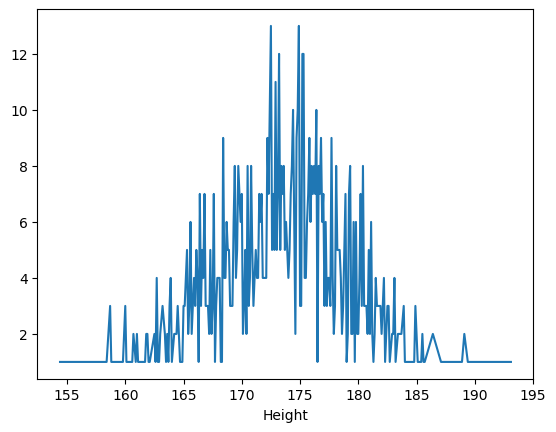

In [13]:
# 각 키가 몇 번씩 등장하는지 확인, 인덱스 순서대로 정렬 후 그래프 그리기
body_df['Height'].value_counts().sort_index().plot()

C:\Users\emma1\AppData\Local\Temp\ipykernel_10848\3380929510.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(body_df['Height'], bw=0.05)


<Axes: xlabel='Height', ylabel='Density'>

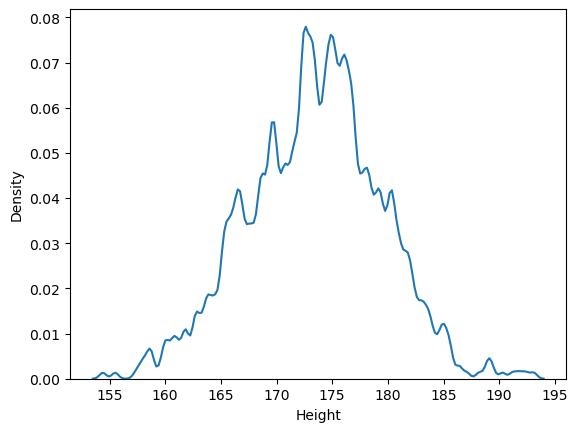

In [ ]:
# seaborn 사용해서 KDE 그래프 그리기.
sns.kdeplot(body_df['Height'], bw=0.05)

#### KDE 활용 예시

<Axes: ylabel='Frequency'>

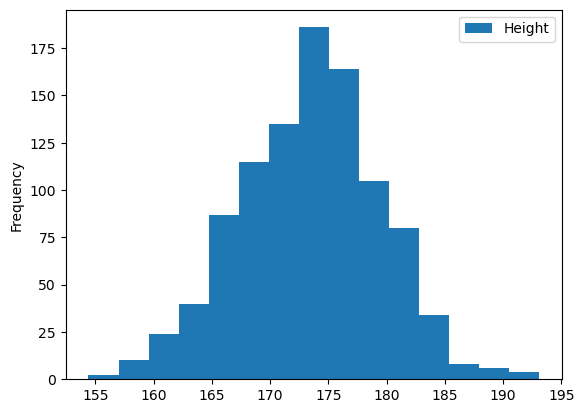

In [19]:
# pandas로 히스토그램 그리기
body_df.plot(kind='hist', y='Height', bins=15)

C:\Users\emma1\AppData\Local\Temp\ipykernel_10848\2490008714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(body_df['Height'], bins=15)


<Axes: xlabel='Height', ylabel='Density'>

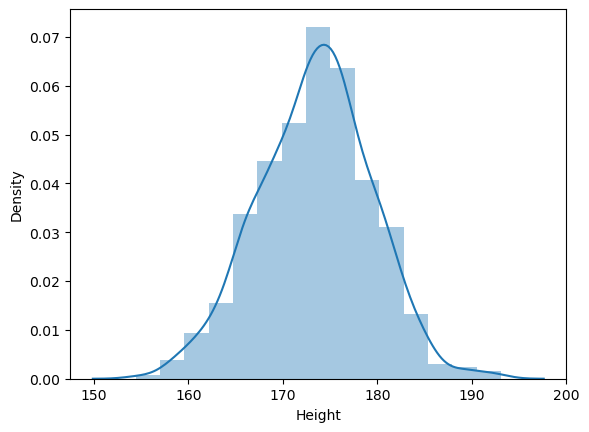

In [23]:
# seaborn을 사용하여 히스토그램 위에 KDE 그래프 그리기
sns.distplot(body_df['Height'], bins=15)

<Axes: >

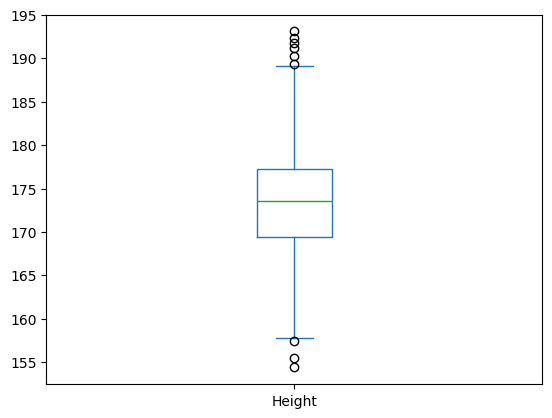

In [24]:
# pandas로 박스 플롯 그리기
body_df.plot(kind='box', y='Height')

<Axes: ylabel='Height'>

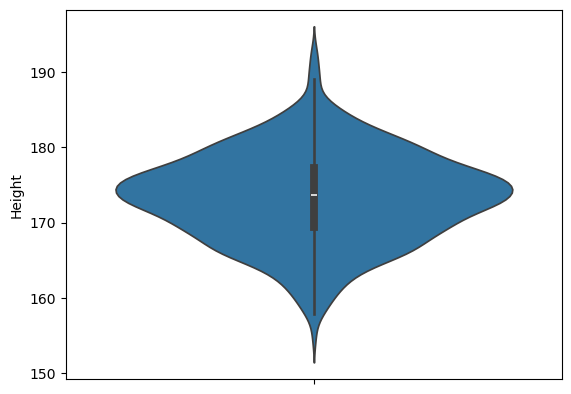

In [25]:
# Seaborn으로 바이올린플롯 그리기
sns.violinplot(y=body_df['Height'])

<Axes: xlabel='Height', ylabel='Weight'>

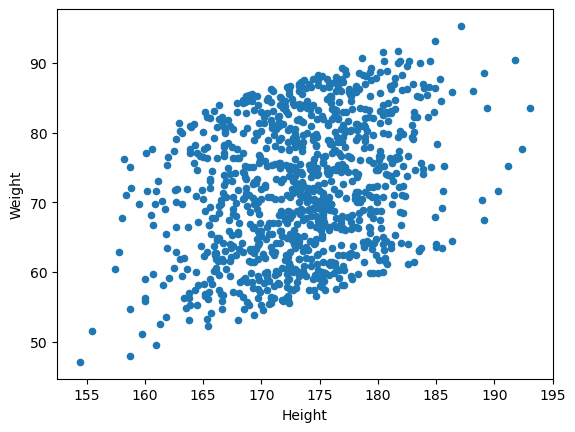

In [26]:
# pandas로 산점도 그래프 그리기 - 키와 몸무게의 연관성 보기
body_df.plot(kind='scatter', x='Height', y='Weight')

<Axes: xlabel='Height', ylabel='Weight'>

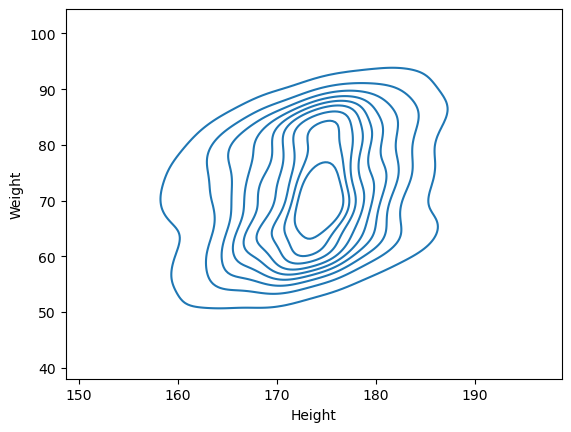

In [28]:
# seaborn으로 등고선 그래프 그리기
sns.kdeplot(x=body_df['Height'], y=body_df['Weight'])   # Height가 x축, Weight가 y축